In [1]:
import sys
import numpy as np
import pandas as pd
# import pyqtgraph as pg
import cnmodel as cnm
from cnmodel import populations
from neuron import h
import matplotlib.pyplot as plt

--No graphics will be displayed.


In [25]:
vertical = populations.Tuberculoventral()
pyramidal = populations.Pyramidal()

vertical.connect(pyramidal)

cf = 16e3
pyramidal_id = pyramidal.select(1, cf=cf, create=True)
pyramidal.resolve_inputs(depth=1)
pyramidal_cell = pyramidal.get_cell(pyramidal_id)[0]

getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse
getcellpars: modelType:  TVmouse


In [22]:
vertical_ids = vertical.real_cells()
vertical_cf_id = vertical_ids[np.argmin(np.abs(cf - vertical._cells['cf'][vertical_ids]))]
vertical_cf = vertical._cells['cf'][vertical_cf_id]
vertical_cell= vertical.get_cell(vertical_cf_id)
vertical_cf_id, vertical_cf

(np.int64(3570), np.float64(15977.834657612437))

In [34]:
vertical_v = h.Vector().record(vertical_cell.soma(0.5)._ref_v)
pyramidal_v = h.Vector().record(pyramidal_cell.soma(0.5)._ref_v)
t = h.Vector().record(h._ref_t)

In [35]:
h.tstop = 0.2*1000
h.dt = 0.025
h.celsius = 34.0

cnm.util.custom_init()
h.run()

0.0

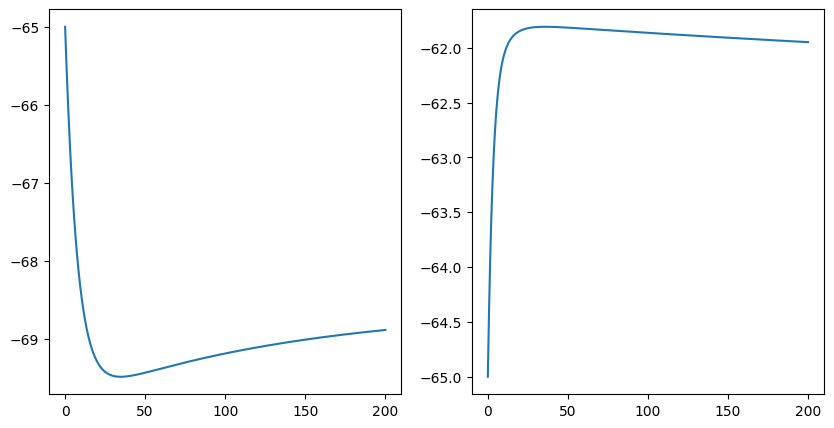

In [37]:
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs.ravel()

axs[0].plot(t, vertical_v)
axs[1].plot(t, pyramidal_v)

In [ ]:
# TODO: add poisson spike train to cells